# Time Analysis

- First, we will create a pandas dataframe including the map, start and goal point and the average time of execution for the 3 algorithms. 
- The average time was calculated by using 5 samples for each algorithm. We have ignored outliners.
- For each map, we have 2 results. In the first one, the start point is at the upper left side of the map and the goal is at the bottom right side of the map. The opposite for the second result.

- It was performed in equal conditions for the 3 algorithms, this means with no extra functions implemented so none of them took extra time executing those functions.


- Map 5 and 7 are the same so we just used map 5. 

- Map 12 is very similar to map 5 but with more obstacles.

**TIME IS MEASURED IN ms**

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

### Creating data:

In [2]:
# Column's names
col = ['MAP', 'START_X','START_Y','END_X','END_Y','TIME_BFS', 'TIME_DFS','TIME_INVENTED']
# Indexes for the dataframe
maps = ['m1_1','m1_2','m2_1','m2_2','m3_1','m3_2','m4_1','m4_2','m5_1','m5_2','m6_1','m6_2','m8_1','m8_2','m9_1','m9_2','m10_1','m10_2','m11_1','m11_2','m12_1','m12_2',]
data =[    
    [1,1,1,7,2,0.998,1.994,1.013],
    [1,7,2,1,1,0.998,3.323,1.977],
    [2,2,2,10,7,2.992,4.005,4.480],
    [2,10,7,2,2,2.490,4.960,5.987],
    [3,4,10,4,14,81.114,110.052,15.850],
    [3,4,14,4,10,78.102,49.366,11.996],
    [4,4,10,4,14,187.4548,148.477,606.814],
    [4,4,14,4,10,246.115,62.6105,929.015],
    [5,1,1,15,20,258.846,164.640,9.970],
    [5,15,20,1,1,461.383,412.822,745.433],
    [6,2,2,10,17,8.477,6.965,11.963],
    [6,10,17,2,2,8.31,10.950,10.973],
    [8,2,2,10,17,10.567,4.03,14.926],
    [8,10,17,2,2,8.965,10.962,1.994],
    [9,1,4,20,15,387.523,282.421,5.981],
    [9,20,15,1,4,511.363,315.934,4.985],
    [10,1,4,1,15,1011.231,1096.214,2721.211],
    [10,1,15,1,4,1061.381,695.345,2680.750],
    [11,1,1,14,20,470.004,114.156,8.968],
    [11,14,20,1,1,875.4655,611.467,8.003],
    [12,1,1,15,20,212.765,57.460,7.987],
    [12,15,20,1,1,412.8351,275.042,554.918]    
      ]
# Create a dataframe using the column's names and the data.
df = pd.DataFrame(data,columns=col, index=maps)
# Exclusive time dataframe
df_times = df[['TIME_BFS','TIME_DFS','TIME_INVENTED']]
# Show me how it looks!
df

,MAP,START_X,START_Y,END_X,END_Y,TIME_BFS,TIME_DFS,TIME_INVENTED
m1_1,1,1,1,7,2,0.9980,1.9940,1.013
m1_2,1,7,2,1,1,0.9980,3.3230,1.977
m2_1,2,2,2,10,7,2.9920,4.0050,4.480
m2_2,2,10,7,2,2,2.4900,4.9600,5.987
m3_1,3,4,10,4,14,81.1140,110.0520,15.850
m3_2,3,4,14,4,10,78.1020,49.3660,11.996
m4_1,4,4,10,4,14,187.4548,148.4770,606.814
m4_2,4,4,14,4,10,246.1150,62.6105,929.015
m5_1,5,1,1,15,20,258.8460,164.6400,9.970
m5_2,5,15,20,1,1,461.3830,412.8220,745.433


Even before analyzing the data, some simple observations can be made. 

- **BFS algorithms:** You can see that generally as the map gets larger the BFS will take longer to run.
- **Greedy algorithms:** In this type of algorithm we see how such a regular structure is not followed. Regardless of the complexity of the map, there are cases where it takes a long time and cases where it takes very little time. This is because the greedy algorithm has worked as expected, that is, it makes optimal decisions locally, expecting it to be a globally optimal solution, which sometimes will work and sometimes it will entangle us too much in the map.

# Box and whisker plots
Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
<img src="../../../../media/boxplot.png" style="width: 700px;"/>

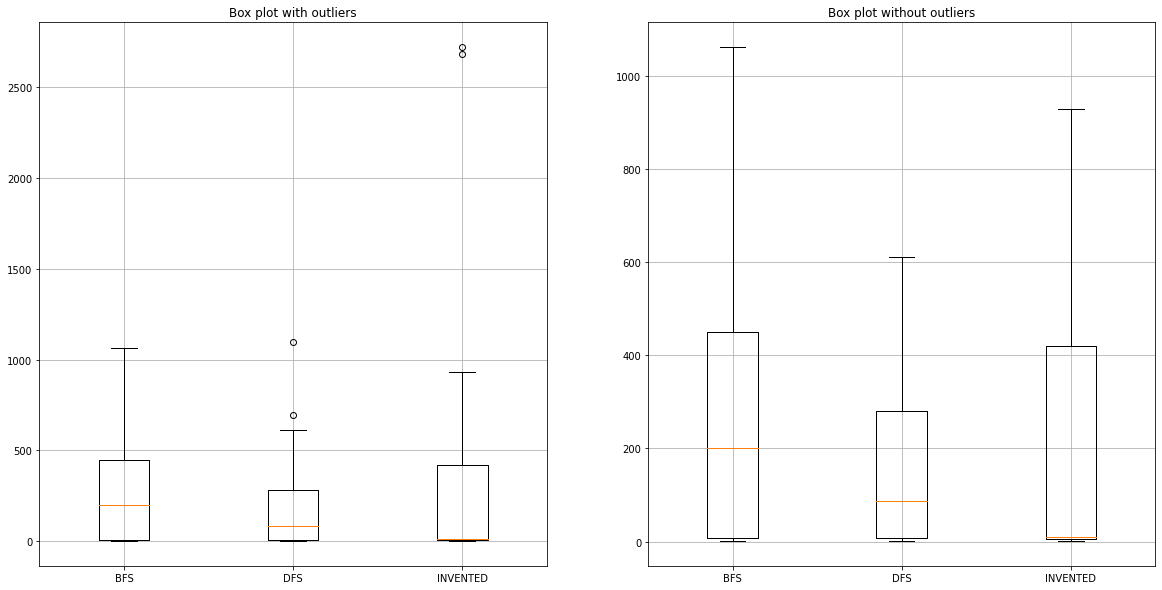

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
# Titles
ax1.set_title('Box plot with outliers')
ax2.set_title('Box plot without outliers')

# Create figures
ax1.boxplot(df_times , labels=['BFS','DFS','INVENTED']);
ax1.grid()
ax2.boxplot(df_times , showfliers=False, labels=['BFS','DFS','INVENTED']);
ax2.grid()

## Results:
On the left plot, we can see the data displayed with outliers. However, the invented algorithm took an excessive extra time for map 10 due to it got stuck and had to go back. This is one of the problems that a greedy algorithm can present. For that reason, I have omitted the outliners on the right map.
It is very interesting to see the three performances:
-	The **BFS** algorithm is the most regular one, it doesn’t have any extreme outliner. Even though the median is the highest of the three algorithms, I think that the strong benefit of this algorithm is how reliable it is; it can take a little more time to run, but we know that we won’t get any crazy results. Simply, it will take longer to run as the map is longer, nevertheless, if the map is not huge (like the ones here) this algorithm has the advantage of being very reliable.
-	The **DFS** algorithm works nicely as well. Its median is a little lower and even though it has some outliers, they are not bigger than some time measurements obtained in the BFS algorithm. Maybe for bigger maps, this algorithm would present more issues, but for these maps, it has worked nicely.
-	The **invented** algorithm honestly seems very interesting to me. You can see what you can expect from a very greedy algorithm: extremely fast times for some cases and huge times for other cases.
